# Arbol de decisión para especies de flores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

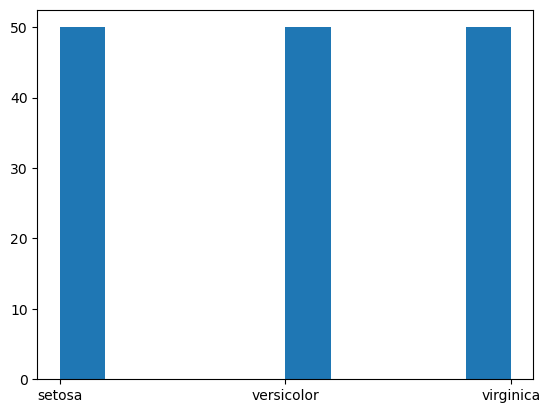

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [7]:
print("1",predictors)
print("2",target)

1 ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
2 Species


In [8]:
import numpy as np

In [9]:
len(data)

150

In [10]:
data["is_train"] = np.random.uniform(0, 1, len(data)) <= 0.7

In [11]:
data["is_train"] = np.random.uniform(0, 1, 150)<=0.70 # el error nace desde aquí, solo genera FALSE

In [12]:
data["is_train"]

0       True
1       True
2       True
3       True
4       True
       ...  
145     True
146     True
147     True
148    False
149     True
Name: is_train, Length: 150, dtype: bool

(array([ 42.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 108.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

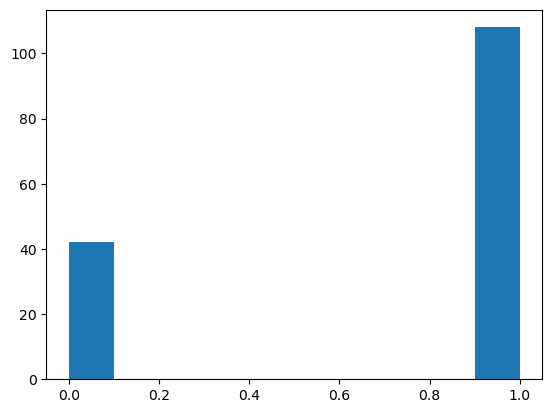

In [13]:
data['is_train_numeric'] = data['is_train'].astype(int)
plt.hist(data['is_train_numeric'])

In [14]:
data["is_train"].unique()

array([ True, False])

In [15]:
train = data[data["is_train"]==True] 
test = data[data["is_train"]==False]

In [16]:
print("train:",train)
#print("test:",test)

train:      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
144           6.7          3.3           5.7          2.5  virginica   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     is_train  is_train_numeric  
0        True                 1  
1        True                 1  
2        True             

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [19]:
preds = tree.predict(test[predictors])

In [20]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,13,0
virginica,0,2,12


## Visualización del árbol de decisión

In [21]:
from sklearn.tree import export_graphviz

In [22]:
with open("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [23]:
import os
from graphviz import Source

os.environ["PATH"] += os.pathsep + '/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/notebooks/resources/iris_dtree.dot' # Reemplace con la ruta correcta en su sistema

In [24]:
from graphviz import Source

file = open("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/notebooks/resources/iris_dtree.dot", "r")
text = file.read()
Source(text)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Cross Validation para la poda

In [25]:
X = data[predictors]
Y = data[target]

In [26]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [28]:
from sklearn.model_selection import KFold

In [31]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [35]:
score = np.mean(scores)
score

0.9333333333333333

In [37]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [38]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

## Random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

RandomForestClassifier(n_jobs=2, oob_score=True)

In [41]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.92307692, 0.07692308, 0.        ],
       [0.96666667, 0.03333333, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.97297297, 0.02702703, 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [42]:
forest.oob_score_

0.9466666666666667